## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

%matplotlib inline

## Importing Dataset

In [2]:
df = pd.read_csv('mtcars.csv')

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Create X and y

In [4]:
X = df['wt']
y = df['mpg']

## Data PreProcessing

In [5]:
from sklearn.model_selection import train_test_split 

## perform a train-test split of 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
## check if shapes are in correct format
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(25,) (7,) (25,) (7,)


In [7]:
## not in correct shape
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0],1)

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],1)

y_train = np.array(y_train)
y_train = y_train.reshape(y_train.shape[0],1)

y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0],1)

## Create Function for Linear Regression

In [8]:
def myFnLinReg(X,y):
    
    ## m -> number of training examples
    ## n -> number of features 
    
    m , n = X.shape
    
    W = np.zeros(shape=(n,1),dtype = np.float64)
    b = 0.0
    
    ## reshape y to avoid error
    y = y.reshape(m,1)
    
    ## maintain history of loss
    loss_history = []
    
    ## alpha -> learning rate
    ## epochs -> number of times gradient descent runs
    ## min_change_steps -> auto-stop if gradient doesn't change by a minimum for 5 conseqcutive steps
    
    alpha = 1e-3
    epochs = 25
    min_change_steps = 5
    min_change_steps_counter = 0
    last_loss = 0
    
    while True:    
        ## calculate hypothesis
        y_hat = np.dot(X,W) + b
        
        ## calculate loss through Mean Squared Error
        loss = np.mean((y_hat - y)**2)
        
        ## append loss
        loss_history.append(loss)
        
        ## calculate gradient
        dW = (1/m)*np.dot(X.T , (y_hat - y ))
        db = (1/m)*np.sum((y_hat - y ))
        
        ## avoid values getting too low
        if abs(dW) < 1e-4:
            break
        if abs(db) < 1e-4:
            break
        
        ## update gradients
        W = W - alpha*dW
        b = b - alpha*db
        
        ## check if gradient changed too little        
        if abs(loss - last_loss) < 1e-5:
            min_change_steps_counter += 1
        else :
            min_change_steps_counter = 0
        
        if(min_change_steps_counter == min_change_steps):
            break
    
        last_loss = loss
        
    return W , b , loss_history

## Function Call to obtain Weights & Bias

In [9]:
## Get Weights, Bias and Loss

W , b , loss_history = myFnLinReg(X_train,y_train)

## Create Predict Function

In [10]:
def predict(W, b , X_pred):
    
    y_pred = np.dot(X_pred.T , W) + b
    
    return y_pred[0][0]

In [11]:
## Predict the Value for wt = 5.5

X_pred = np.array([5.5])
X_pred = X_pred.reshape(1,1)

In [12]:
predict(W , b , X_pred)

9.915936576790422

## Create Accuracy Functions

In [13]:
def getAccuracy_RMSE(W , b , X_test , y_test):
    
    y_hat = np.dot(X_test , W) + b
    accuracy = np.sum((y_hat - y_test) ** 2)/7
    accuracy = accuracy ** 0.5
    
    return round(accuracy,ndigits=2)

In [14]:
def getAccuracy_RSq(W , b , X_test , y_test):
    
    y_hat = np.dot(X_test , W) + b
    accuracy = 1 - np.sum((y_hat - y_test) ** 2)/np.sum((y_test - np.mean(y_test)) ** 2)
    accuracy = accuracy*100
    return round(accuracy,ndigits=2)

### R-Square Accuracy

In [15]:
r_sq = getAccuracy_RSq ( W , b , X_test , y_test)
print(r_sq , "%")

68.76 %


### RMSE Accuracy

In [16]:
rmse = getAccuracy_RMSE(W , b , X_test , y_test)
print(rmse)

4.28


## Compare Model Accuracy with Inbuilt Library Function

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [19]:
linear_model.predict(X_pred)

array([[9.38632859]])

In [20]:
linear_model.score(X_test,y_test)

0.7200862006836332

#### Accuracy Difference of ~4%

## Plotting Cost Functions

Text(0, 0.5, 'Cost')

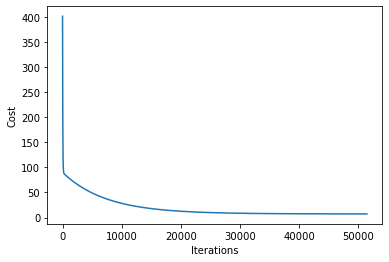

In [21]:
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")

## Mini Batch Gradient Descent

In [52]:
def mini_batch_gradient_descent_Linear_Regression(X,y,n_epochs = 20, batch_size = 0.1):
    
    ## m -> number of training examples
    ## n -> number of features 
    
    m,n = X.shape
    
    ## samples
    sample = int(m*batch_size)
    
    ## weights and bias
    W = np.zeros(shape=(n,1),dtype = np.float64)
    b = 0.0
    
    ## reshape y to avoid error
    y = y.reshape(m,1)
    
    ## maintain history of loss
    loss_history = []
    
    ## alpha -> learning rate
    ## epochs -> number of times gradient descent runs
    ## min_change_steps -> auto-stop if gradient doesn't change by a minimum for 5 conseqcutive steps
    
    alpha = 1e-3
    epochs = 1
    min_change_steps = 5
    min_change_steps_counter = 0
    last_loss = 0
    
    while epochs < n_epochs:
        
        ## get a sample of training set
        batch_index = random.randint(low = 0 , high = m, size = sample)
        X_batch = X_train[batch_index]
        y_batch = y_train[batch_index]
        
        for i in range(sample):
            ## calculate hypothesis
            y_hat = np.dot(X_batch,W) + b

            ## calculate loss through Mean Squared Error
            loss = np.mean((y_hat - y_batch)**2)

            ## append loss
            loss_history.append(loss)

            ## calculate gradient
            dW = (1/2*m)*np.dot(X_batch.T , (y_hat - y_batch ))
            db = (1/2*m)*np.sum((y_hat - y_batch ))

            ## avoid values getting too low
            if abs(dW) < 1e-4:
                break
            if abs(db) < 1e-4:
                break

            ## update gradients
            W = W - alpha*dW
            b = b - alpha*db
        
        epochs += 1

        
    return W , b , loss_history

### Function Call for Mini Batch Gradient Descent

In [53]:
sgd_w, sgd_b, sgd_loss = mini_batch_gradient_descent_Linear_Regression(X_train,y_train, n_epochs= 10000)

### R Squared Error

In [54]:
r_sq = getAccuracy_RSq ( sgd_w , sgd_b , X_test , y_test)
print(r_sq , "%")

73.71 %


### Increased Accuracy by ~5

### RMSE 

In [57]:
rmse = getAccuracy_RMSE(sgd_w , sgd_b , X_test , y_test)
print(rmse)

3.93


### Prediction

In [55]:
predict(sgd_w , sgd_b , X_pred)

8.750587591317117

Text(0.5, 1.0, 'Mini Batch Gradient Descent')

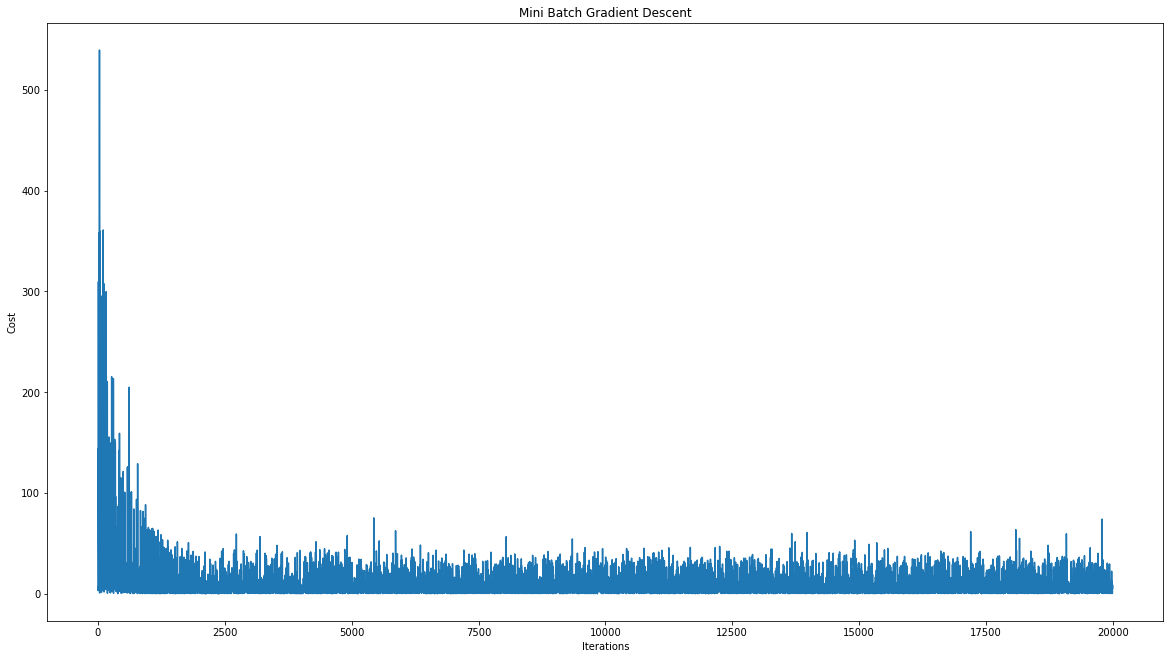

In [61]:
plt.subplots(figsize=(20,11))
plt.plot(sgd_loss)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Mini Batch Gradient Descent")